In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
from matplotlib import cm
import seaborn
import matplotlib
from matplotlib.gridspec import GridSpec

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import
dir_name=['hom','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1alt','n=2bis','n=3bis','n=4bis_1','n=4bis_2','n=4bis_3']
name_mode=['Homogeneous solution','n=1','n=2','n=3','n=4','n=5','n=6','n=7','n=8','n=9','n=1 alternative','n=2 bis','n=3 bis','n=4bis_1','n=4bis_2','n=4bis_3']

P_mode_tot=[]
W_mode_tot=[]
O_mode_tot=[]
Rains_mode_tot=[]
Stab_mode_tot=[]
Lmb_mode_tot=[]

for i in range(len(dir_name)):
    #print('Saving files for '+dir_name[i])
    with open("L100/"+dir_name[i]+"/P_mode_tot.txt", "rb") as fp:
        P_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/W_mode_tot.txt", "rb") as fp:
        W_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/O_mode_tot.txt", "rb") as fp:
        O_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Rains_mode_tot.txt", "rb") as fp:
        Rains_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Stab_mode_tot.txt", "rb") as fp:
        Stab_mode_tot.append(pickle.load(fp))
    with open("L100/"+dir_name[i]+"/Lmb_mode_tot.txt", "rb") as fp:
        Lmb_mode_tot.append(pickle.load(fp))
         
   
with open("L100/param.txt", "rb") as fp:   
    param = pickle.load(fp)


N_mode=len(P_mode_tot)
print(N_mode)

16


In [3]:

# Colorblind 
color_mode=[]
color_mode.append('black')
seaborn.color_palette("colorblind")
for i in range(10):
    color_mode.append(seaborn.color_palette("colorblind")[i])

color_mode.append(seaborn.color_palette("dark")[1])
color_mode.append(seaborn.color_palette("dark")[2]) 
color_mode.append(seaborn.color_palette("dark")[3])  
color_mode.append(seaborn.color_palette("dark")[4])  
color_mode.append(seaborn.color_palette("dark")[5])  

#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

In [4]:
def stability_range_N_eig(P,W,O,Rains,Lmb,L,param,N_eig):
    #évalue la stabilité des solutions le long d'un mode pour N_eig valeurs propres
    M=Rains.shape[0]
    N=P.shape[1]
    stab=np.array(np.zeros((N_eig,M),dtype='bool'))
    #Lmb=np.array(np.zeros((M,3*N)),dtype=complex)
    for i in range(M):
        for j in range(N_eig):
            if Lmb[i,j]>10**(-7):
                stab[j,i]=True
            else:
                stab[j,i]=False
    return(stab)


In [5]:
n_mode=[0,1,2,3,4,5,6,7,8,9]
N_mode=len(n_mode)
N_eig=4
Stab_Mode_tot=[]
for i in range(N_mode):
    Stab=stability_range_N_eig(P_mode_tot[n_mode[i]],W_mode_tot[n_mode[i]],O_mode_tot[n_mode[i]],Rains_mode_tot[n_mode[i]],Lmb_mode_tot[n_mode[i]],L,param,N_eig)
    Stab_Mode_tot.append(Stab)

In [6]:
print(np.shape(Lmb_mode_tot[n_mode[0]]))


(391, 300)


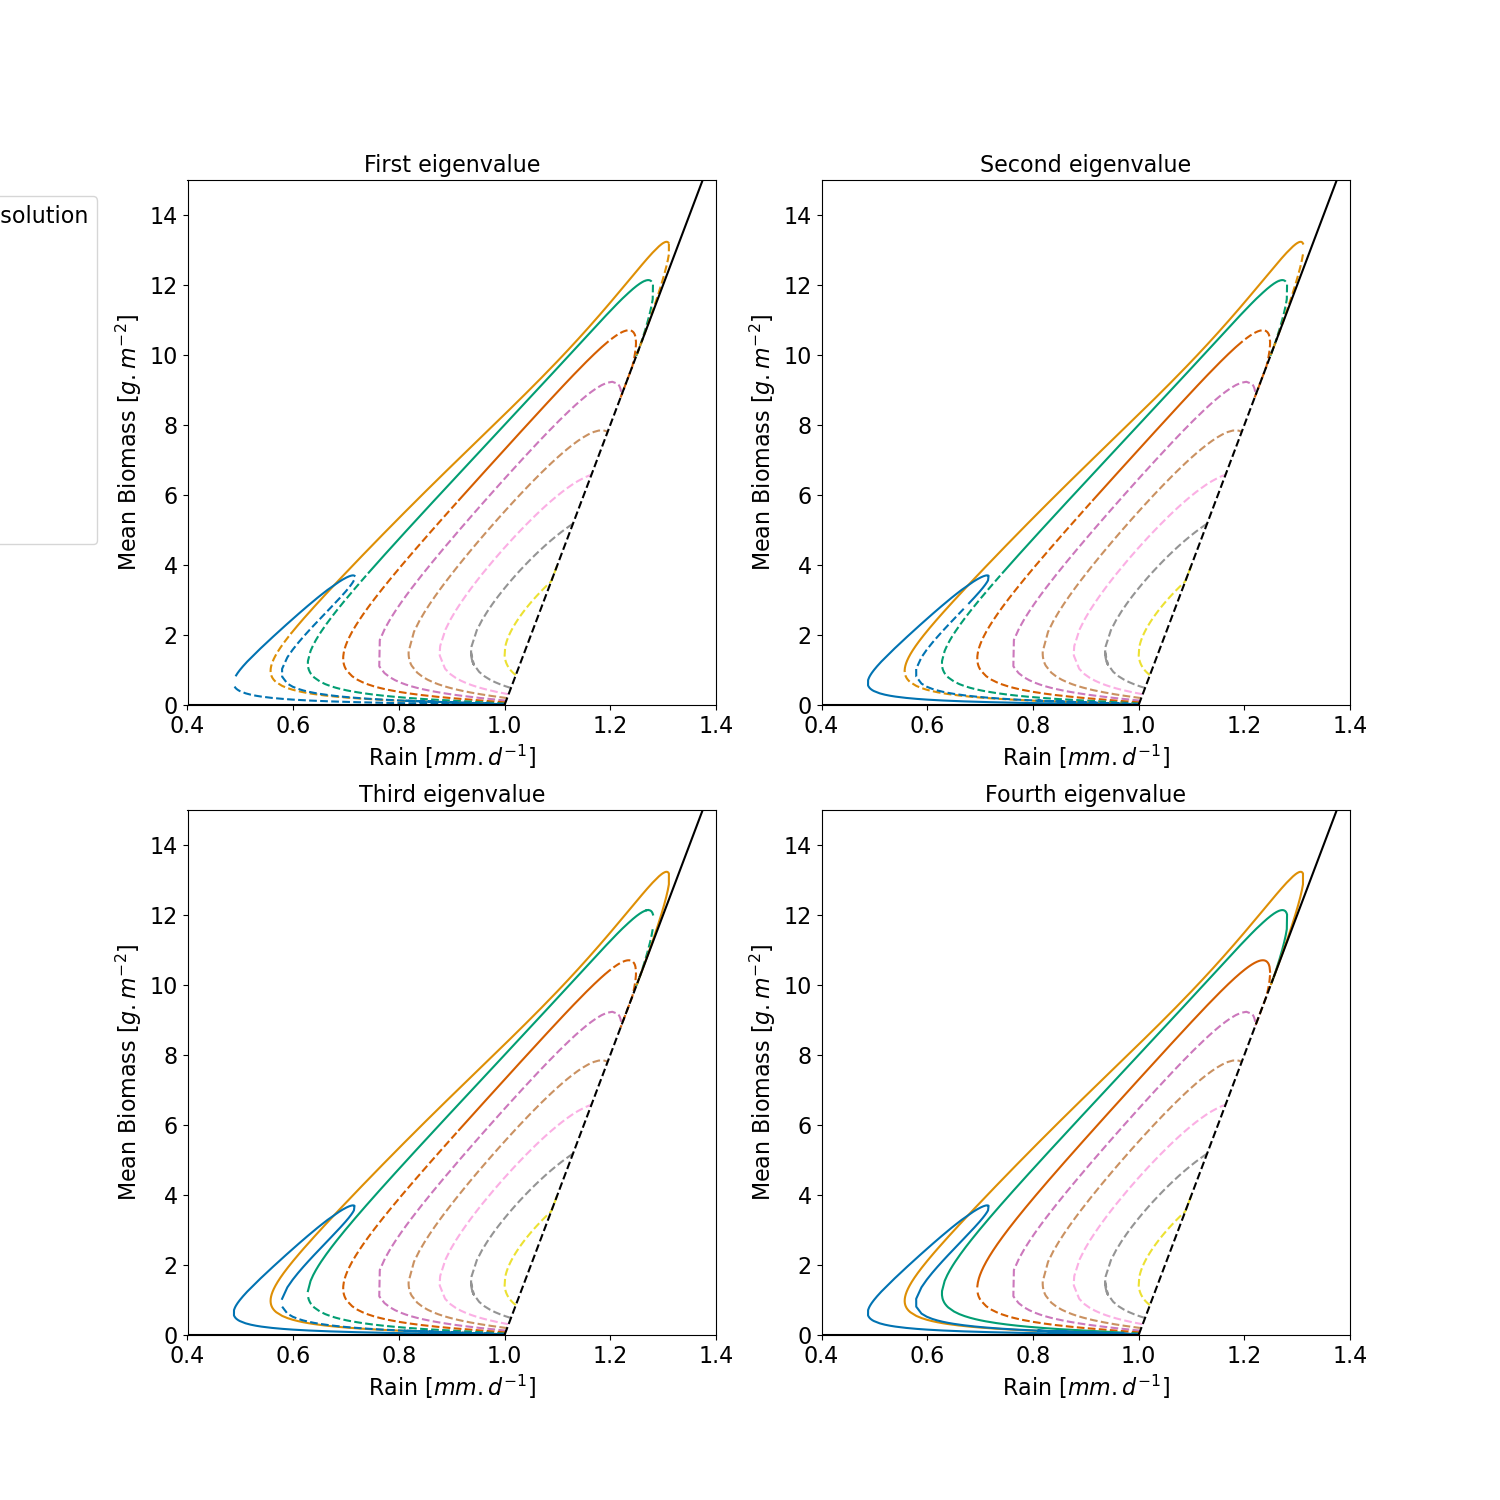

In [8]:

Zorder=-np.arange(0,N_mode)
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2,figsize=(15,15))

axs = [ax1, ax2, ax3, ax4]

 
for j in range(N_eig):
    for i in range(0,N_mode):
        axs[j].plot(np.ma.masked_where(True^Stab_Mode_tot[i][j,:], Rains_mode_tot[n_mode[i]]),np.ma.masked_where(True^Stab_Mode_tot[i][j,:], np.mean(P_mode_tot[n_mode[i]],axis=1)),linestyle='dashed',markersize=1,color=color_mode[n_mode[i]],zorder=Zorder[i])
        axs[j].plot(np.ma.masked_where(Stab_Mode_tot[i][j,:], Rains_mode_tot[n_mode[i]]),np.ma.masked_where(Stab_Mode_tot[i][j,:], np.mean(P_mode_tot[n_mode[i]],axis=1)),markersize=4,color=color_mode[n_mode[i]],label=name_mode[n_mode[i]],linestyle='solid',zorder=Zorder[i])
    axs[j].set_xlim(0.4,1.4)
    axs[j].set_ylim(0,20)
    axs[j].set_title('Eigenvalue: %d'%(j+1),fontsize=16)
    axs[j].set_xlabel('Rain $[mm.d^{-1}]$',fontsize=16)
    axs[j].set_ylabel('Mean Biomass $[g.m^{-2}]$',fontsize=16)
    axs[j].set_ylim((0,15))
    
axs[0].legend()
axs[0].legend(bbox_to_anchor=(-0.15,0.99),fontsize=16)
axs[0].set_title('First eigenvalue',fontsize=16)
axs[1].set_title('Second eigenvalue',fontsize=16)
axs[2].set_title('Third eigenvalue',fontsize=16)
axs[3].set_title('Fourth eigenvalue',fontsize=16)


axs[0].tick_params(axis='both', which='major', labelsize=16)
axs[1].tick_params(axis='both', which='major', labelsize=16)
axs[2].tick_params(axis='both', which='major', labelsize=16)
axs[3].tick_params(axis='both', which='major', labelsize=16)

plt.savefig('figure/bif_diag_eigen.pdf',dpi=500,bbox_inches='tight')

Text(0.5, 1.0, 'Fourth eigenvalue')

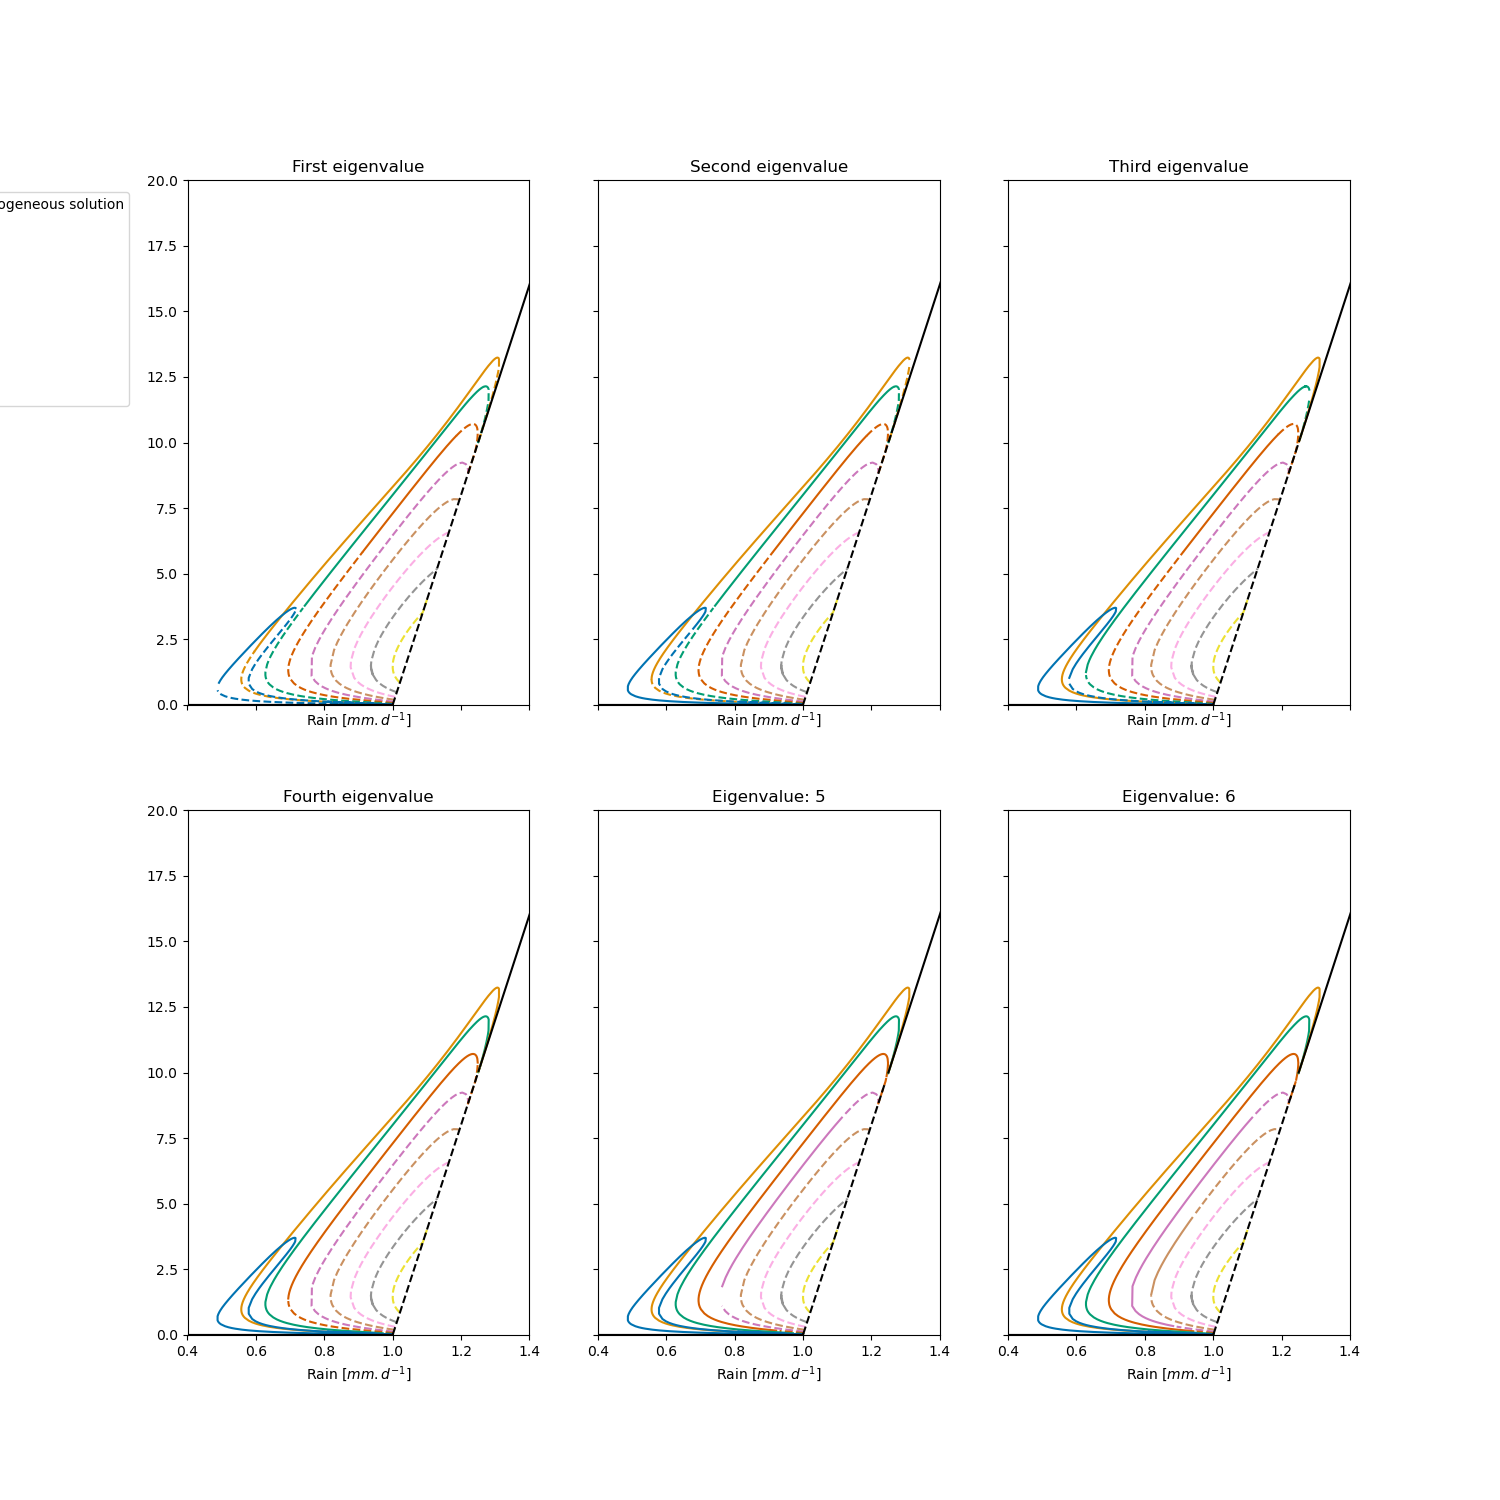

In [14]:

Zorder=-np.arange(0,N_mode)
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(15,15), sharex=True, sharey=True)

axs = [ax1, ax2, ax3, ax4,ax5,ax6]

N_eig=6
for j in range(N_eig):
    for i in range(0,N_mode):
        axs[j].plot(np.ma.masked_where(True^Stab_Mode_tot[i][j,:], Rains_mode_tot[n_mode[i]]),np.ma.masked_where(True^Stab_Mode_tot[i][j,:], np.mean(P_mode_tot[n_mode[i]],axis=1)),linestyle='dashed',markersize=1,color=color_mode[n_mode[i]],zorder=Zorder[i])
        axs[j].plot(np.ma.masked_where(Stab_Mode_tot[i][j,:], Rains_mode_tot[n_mode[i]]),np.ma.masked_where(Stab_Mode_tot[i][j,:], np.mean(P_mode_tot[n_mode[i]],axis=1)),markersize=4,color=color_mode[n_mode[i]],label=name_mode[n_mode[i]],linestyle='solid',zorder=Zorder[i])
    axs[j].set_xlim(0.4,1.4)
    axs[j].set_ylim(0,20)
    axs[j].set_title('Eigenvalue: %d'%(j+1))
    axs[j].set_xlabel('Rain $[mm.d^{-1}]$')
axs[0].legend()
axs[0].legend(bbox_to_anchor=(-0.15,0.99))
axs[0].set_title('First eigenvalue')
axs[1].set_title('Second eigenvalue')
axs[2].set_title('Third eigenvalue')
axs[3].set_title('Fourth eigenvalue')
#plt.savefig('figure/bif_diag_eigen.pdf',dpi=500,bbox_inches='tight')

[73]


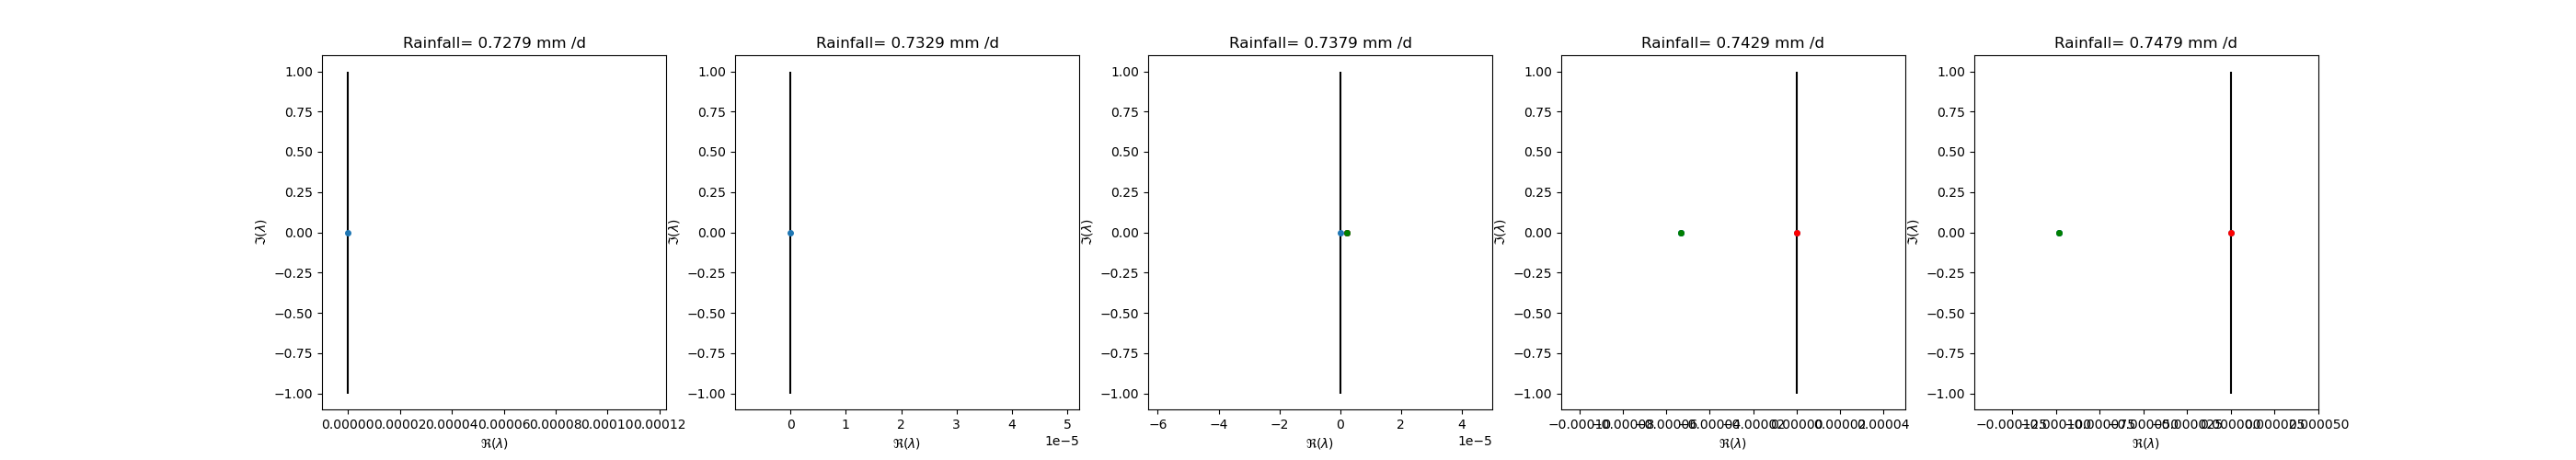

In [36]:
rain=0.7355
#rain=0.9227
n=1
n_mode=3
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)

fig, axs = plt.subplots(1, 5,figsize=(28,5))
for i in range(5):
    axs[i].plot(np.real(Lmb_mode_tot[n_mode][ind-2+i])[:50],np.imag(Lmb_mode_tot[n_mode][ind-2+i])[:50],marker='o',linestyle='none',markersize=4)
    axs[i].plot(np.real(Lmb_mode_tot[n_mode][ind-2+i])[0],np.imag(Lmb_mode_tot[n_mode][ind-2+i])[0],marker='o',color='red',linestyle='none',markersize=4)
    axs[i].plot(np.real(Lmb_mode_tot[n_mode][ind-2+i])[1],np.imag(Lmb_mode_tot[n_mode][ind-2+i])[1],marker='o',color='green',linestyle='none',markersize=4)
    axs[i].set_xlim((np.real(Lmb_mode_tot[n_mode][ind-1+i])[2]-0.00001,np.max(np.real(Lmb_mode_tot[n_mode][ind-1+i])[0])+0.00005))
    axs[i].set_xlabel('$\Re (\lambda)$')
    axs[i].set_ylabel('$\Im (\lambda)$')
    axs[i].set_title('Rainfall= %.4f mm /d'%(Rains_mode_tot[n_mode][ind-2+i]))
    axs[i].vlines(0,-1,1,color='black')


[30]
100


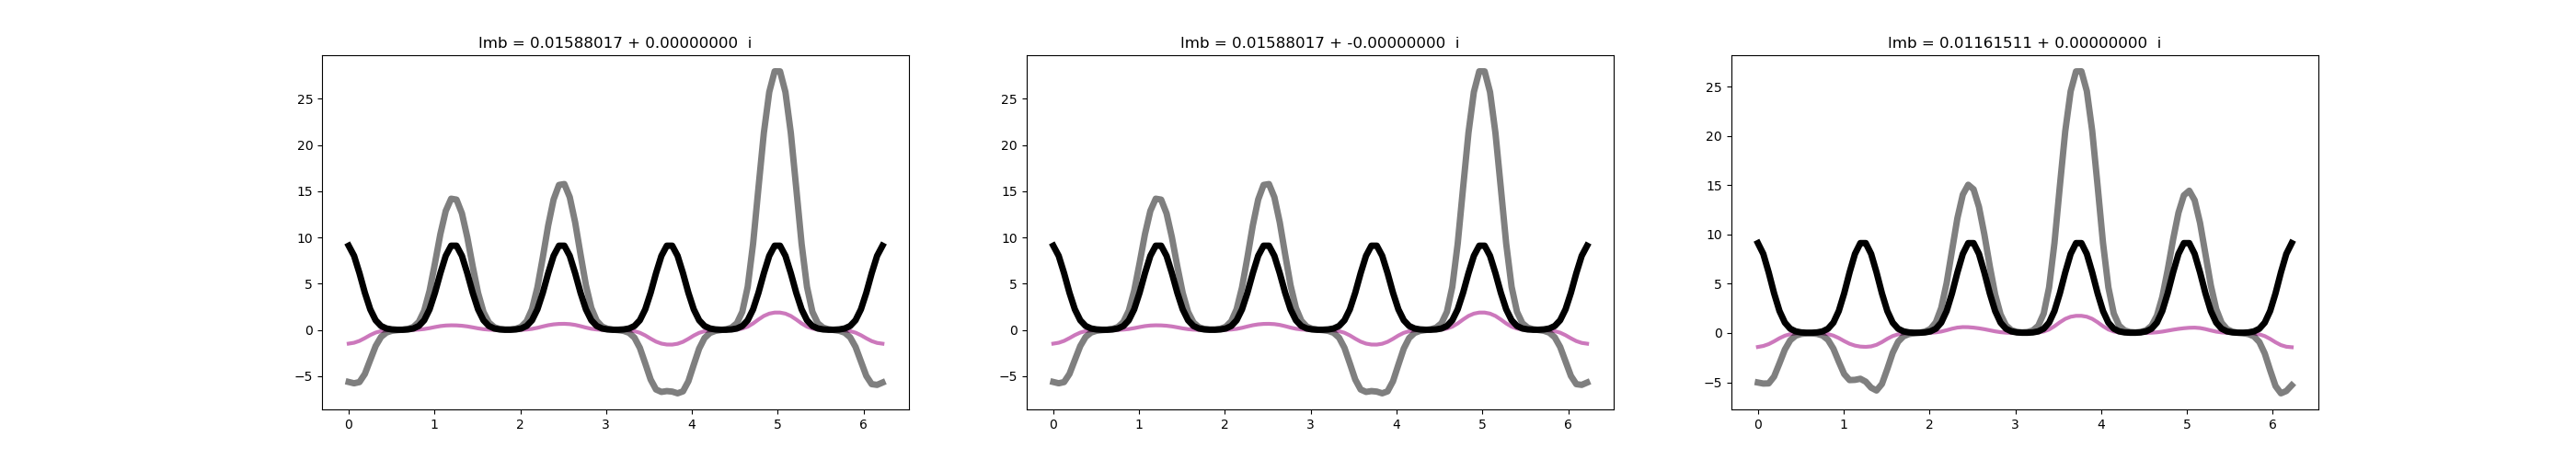

In [46]:
rain=0.7355
#rain=0.9227
n=1
n_mode=5
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*100,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    


[54]
100


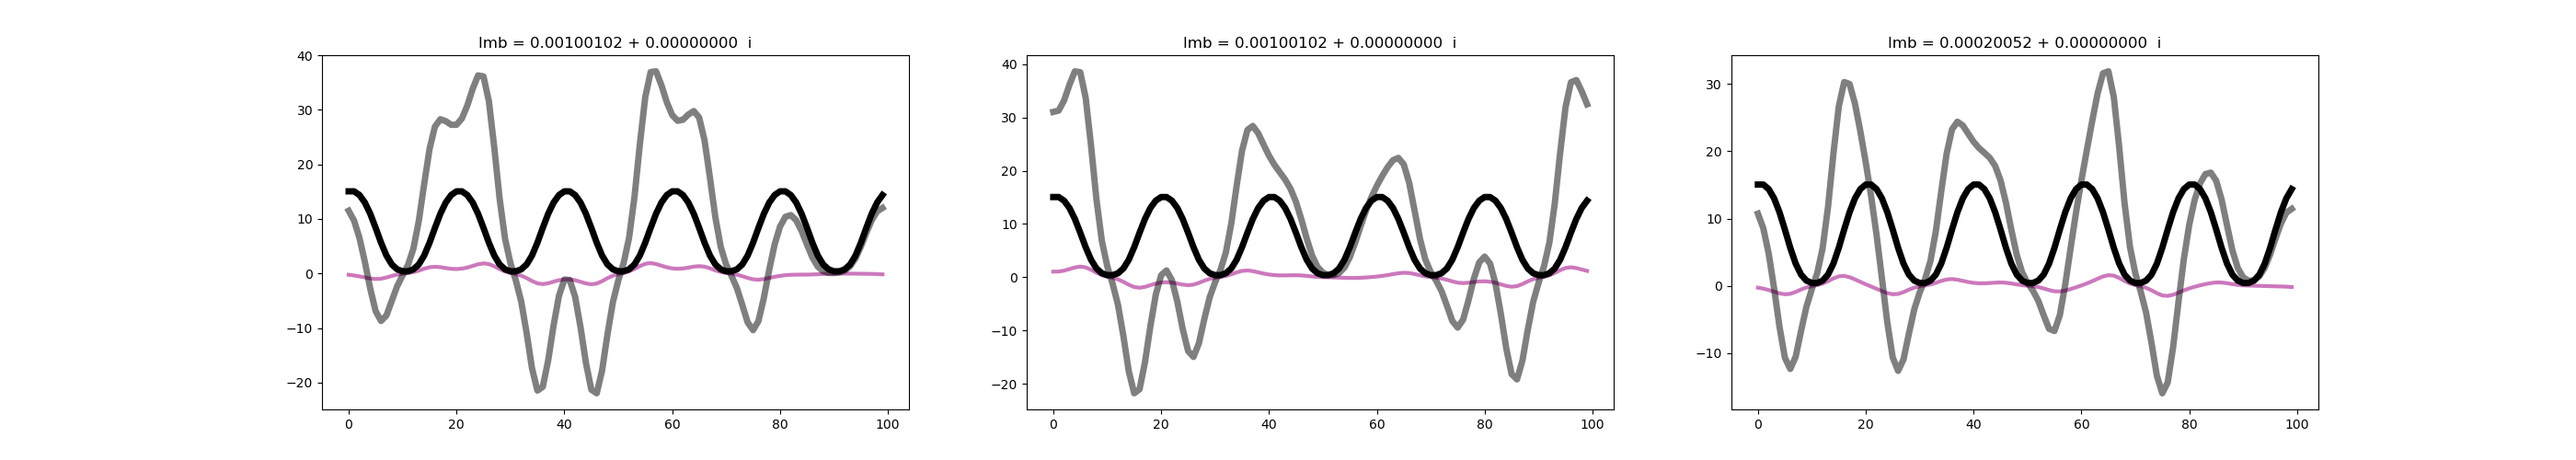

In [9]:
rain=1.05
#rain=0.9227
n=1
n_mode=5
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)*(L/(2*np.pi))
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*150,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    

[106]
100


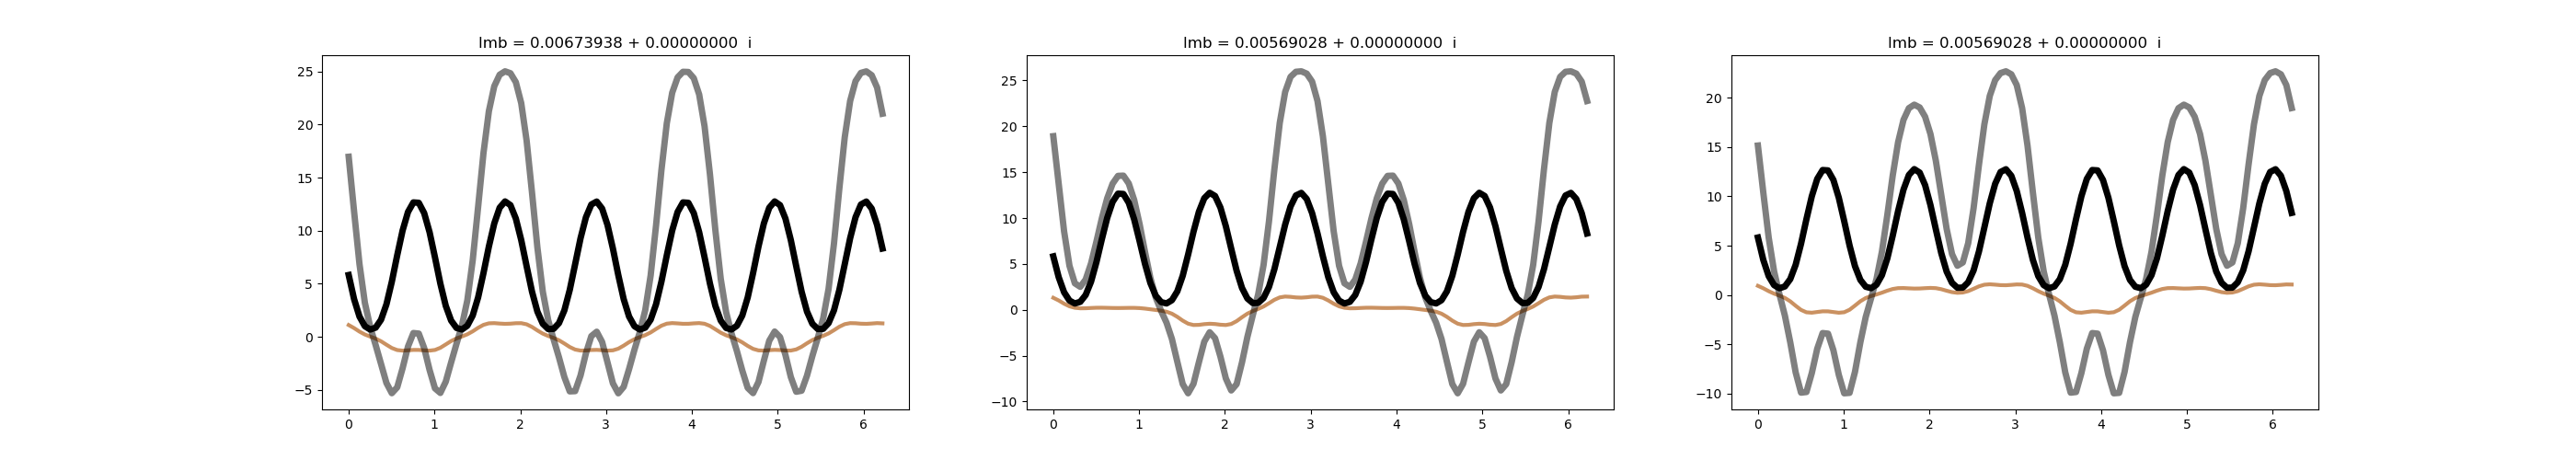

In [10]:
rain=1.05
#rain=0.9227
n=1
n_mode=6
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*100,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    


[35]
100


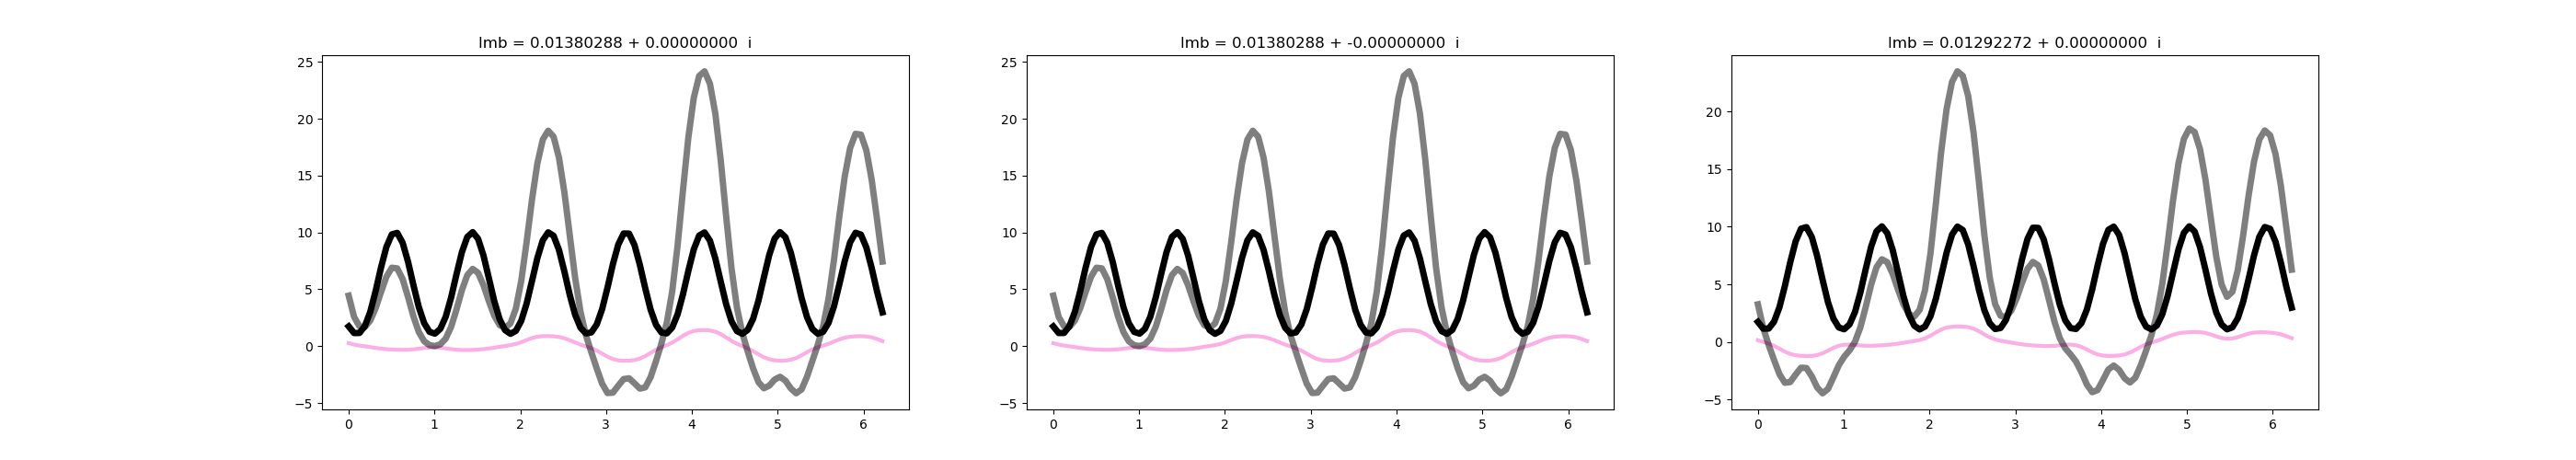

In [11]:
rain=1.05
#rain=0.9227
n=1
n_mode=7
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*100,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    


[66]
100


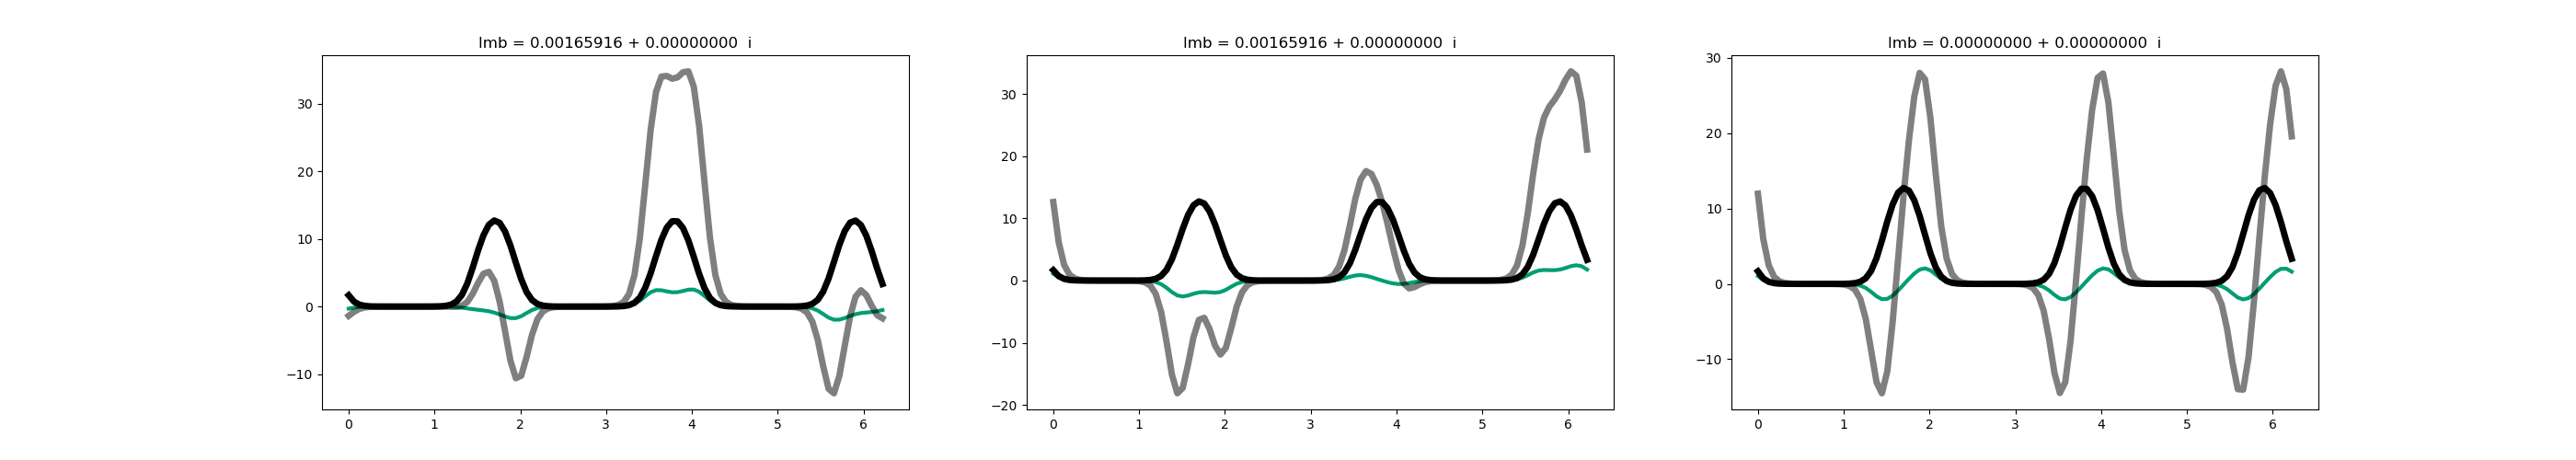

In [49]:
rain=0.7
#rain=0.9227
n=1
n_mode=3
ind=selec_rain(rain,3,10,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*100,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    


[285]
100


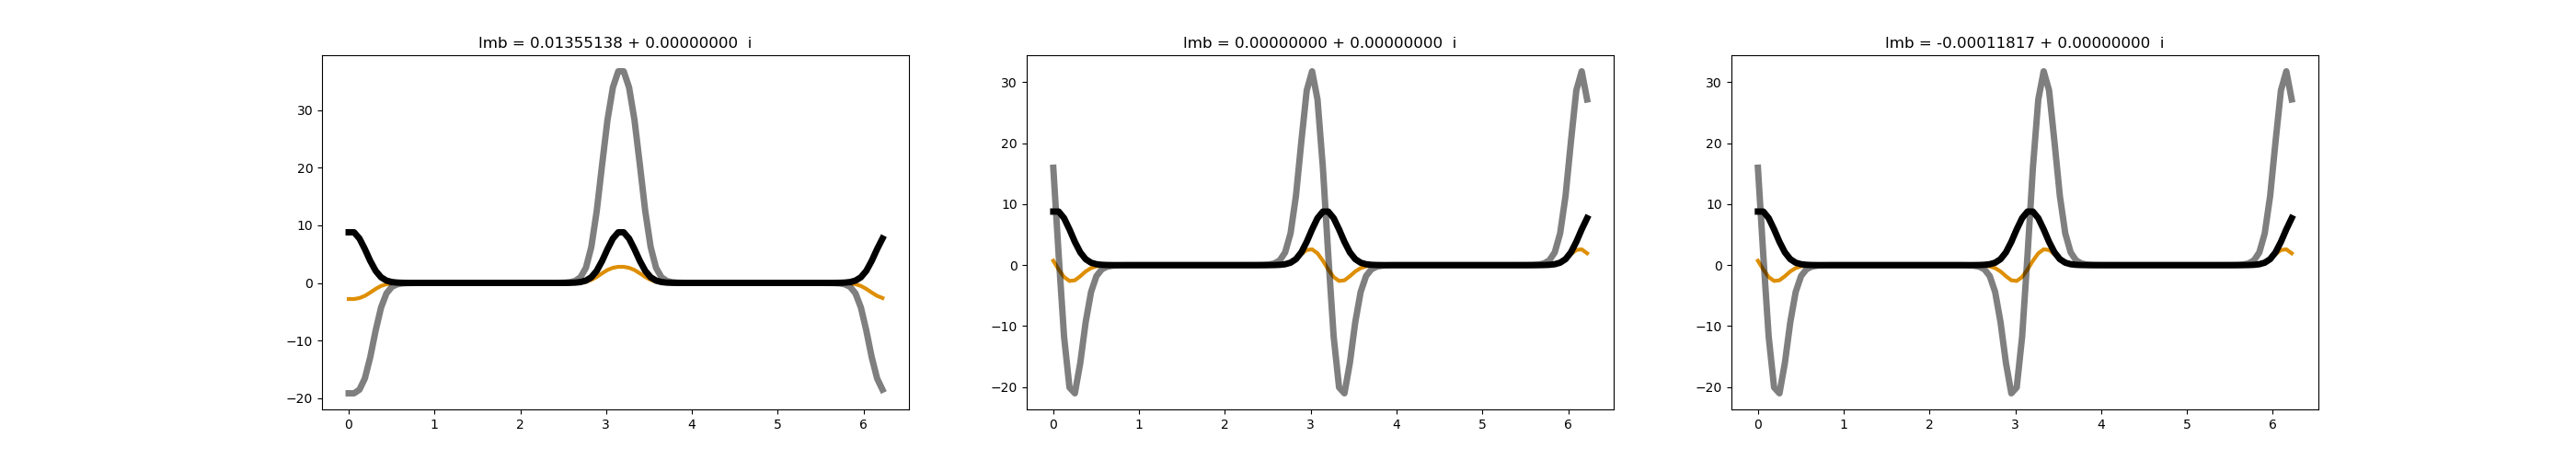

In [53]:
rain=0.56
#rain=0.9227
n=1
n_mode=2
ind=selec_rain(rain,1,3,Rains_mode_tot[n_mode],np.mean(P_mode_tot[n_mode],axis=1))
print(ind)
ind=ind[0]
#Spatial grid
L=100
N=100
dx=2*np.pi/N
x=np.arange(0,2*np.pi,dx)
#Eigenvectors
lmb,vec=stability_eigen(P_mode_tot[n_mode][ind,:].T,W_mode_tot[n_mode][ind,:].T,O_mode_tot[n_mode][ind,:].T,Rains_mode_tot[n_mode][ind],L,param)

fig, axs = plt.subplots(1, 3,figsize=(28,5))
for i in range(3):
    axs[i].plot(x,np.real(vec[:N,i])*10,label='Biomass',linewidth=3,color=color_mode[n_mode])
    axs[i].plot(x,P_mode_tot[n_mode][ind,:],label='Biomass',linewidth=5,color='black')
    axs[i].plot(x,P_mode_tot[n_mode][ind,:]+np.real(vec[:N,i])*100,label='Biomass',linewidth=5,color='black',alpha=0.5)
    axs[i].set_title('lmb = %.8f + %.8f  i'%(np.real(Lmb_mode_tot[n_mode][ind][i]),np.imag(Lmb_mode_tot[n_mode][ind][i])))
    
